In [1]:
import numpy as np
import matplotlib.pyplot as plt
import stablab

In [2]:
from stable_model import (full_gas_Hugoniot, H_stable_model, 
                          RH_stable_model, F_stable_model,
                          Flinear_stable_model, plot_profile_stable_model,
                          get_prof, A_stable_model_balflux)

In [3]:
# parameters
s = stablab.Struct()
p = stablab.Struct()

s.solve = 'bvp'

p.S_neg = -5
p.none = 1
p.mu = 1
p.kappa = 1
p.S0 = 0
p.tau0 = 1

In [4]:
# plus and minus infinity endstates
p = RH_stable_model(p)

# phase condition
s.phase = np.array([0.5*(p.tau_plus+p.tau_neg),0.5*(p.S_plus+p.S_neg)])

# order in which to apply phase conditions
s.order = np.array([0,1])

# profile ode
s.F = F_stable_model

# Jacobian function
s.Flinear = Flinear_stable_model

# number of profile equations to integrate
s.n = 2

#end states
s.UL = np.array([p.tau_neg, p.S_neg])
s.UR = np.array([p.tau_plus, p.S_plus])

s.stats = 'off'

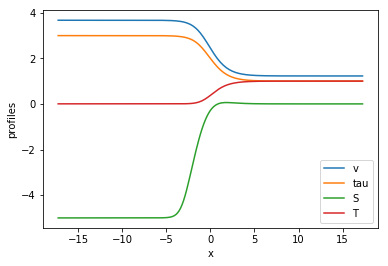

In [5]:
if s.solve == 'bvp':
    #tolerance at end states
    s.tol = 1e-6
    [p,s] = stablab.profile_flux(p,s)
    plot_profile_stable_model(p,s)

elif s.solve == 'ode':
    s.tol = 1e-8
    s.sol = get_prof(s.F,s.Flinear,np.array([[p.tau_plus,p.S_plus],
                     [p.tau_neg,p.S_neg]]),s.tol,time,p,s)
    s.I = 1
    s.L = s.sol.t[0]
    s.R = s.sol.t[-1]
    if s.L > s.R:
        temp  = s.R
        s.R = s.L
        s.L = temp

In [6]:
# Evans matrix
Amat = A_stable_model_balflux

In [7]:
# structure variables
s,e,m,c = stablab.emcset(s,'front',stablab.evans.LdimRdim(Amat,s,p),
                            'default',Amat)
s.L_max = 10000
s.R_max = 10000

# refine the Evans function computation to achieve set relative error
c.refine = 'on'

# display a waitbar
c.stats = 'on'

In [8]:
# Radius
R = 32
p.R = R

In [9]:
m.method = stablab.evans.drury_no_radial

In [10]:
# set up the preimage
circpnts = 20;  imagpnts = 20;  spread = 4;  zerodist = 10**(-6);
preimage = stablab.semicirc(circpnts,imagpnts,c.ksteps,R,spread,zerodist)

In [14]:
# compute Evans function
c.refine = 'on'
halfw, domain = stablab.Evans_compute(preimage,c,s,p,m,e)
w = halfw / halfw[0]
w = np.concatenate((w,np.flipud(np.conj(w))))

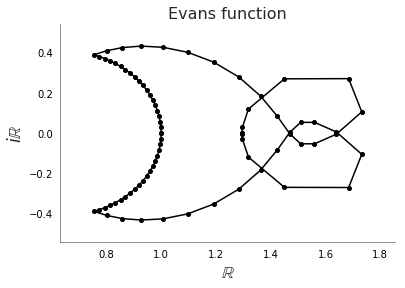

In [15]:
# plot the Evans function
stablab.Evans_plot(w)